# Задание 6

Решить задачу Коши
$$\frac{dx}{dt} = -x,\; x(0) = 1,\; 0 < t < 3$$
методом Эйлера первого порядка точности и методами Рунге-Кутты второго и четвертого порядка точности.

In [1]:
from matplotlib import pyplot as plt
from math import exp

In [2]:
a = 0
b = 3
x_0 = 0
y_0 = 1
N = 100
alpha = 0.75

In [3]:
def f(x, y):
    return -y

## Аналитическое решение

$$\frac{dx}{x} = -dt$$

$$lnx = -t + C$$

$$x(t) = e^{-t + C}$$

$$x(0) = e^{C} = {C}' = 1$$

$$x(t) = e^{-t}$$

In [4]:
def Solution(a, b, N):
    a = min(a, b)
    b = max(a, b)
    if N <= 0 :
        print("Incorect number of splits")
        return
    h = (b - a) / N
    x = []
    y = [] 
    for i in range(0, N+1):
        y.append(exp(-(a + i*h)))
        x.append(a + i*h)
    return x, y

## Метод Эйлера

$$x_{i+1} = x_{i} + h$$

$$y_{i+1} = y_{i} + hf(x_{i}, y_{i})$$

In [5]:
def Euler(f, a, b, N, x_0, y_0):
    a = min(a, b)
    b = max(a, b)
    if N <= 0 :
        print("Incorect number of splits")
        return
    h = (b - a) / N
    x = []
    y = []
    x.append(x_0)
    y.append(y_0)
    for i in range(0, N):
        y.append(y[i] + h * f(x[i], y[i]))
        x.append(x[i] + h)
    return x, y

## Метод Рунге-Кутты 2-го порядка

$$x_{i+1} = x_{i} + h$$

$$y_{i+1} = y_{i} + h[(1-\alpha )f(x_{i}, y_{i}) + \alpha f(x_{i} + \frac{h}{2\alpha}, y_{i} + \frac{h}{2\alpha} f(x_{i}, y_{i})))]$$

In [6]:
def RungeKutta_2nd(f, alpha, a, b, N, x_0, y_0):
    a = min(a, b)
    b = max(a, b)
    if N <= 0 :
        print("Incorect number of splits")
        return
    h = (b - a) / N
    x = []
    y = []
    x.append(x_0)
    y.append(y_0)
    for i in range(0, N):
        y.append(y[i] + h * ((1-alpha)*f(x[i], y[i]) + alpha*f(x[i]+h/(2*alpha), y[i]+h/(2*alpha)*f(x[i], y[i]))))
        x.append(x[i] + h)
    return x, y    

## Метод Рунге-Кутты 4-го порядка

$$x_{i+1} = x_{i} + h$$

$$y_{i+1} = y_{i} + \frac{h}{6}[k_1 + 2k_2 + 2k_3 + k_4]$$

$$k_1 = f(x_i, y_i)$$

$$k_2 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}k_1)$$

$$k_3 = f(x_i + \frac{h}{2}, y_i + \frac{h}{2}k_2)$$

$$k_4 = f(x_i + h, y_i + hk_3)$$

In [7]:
def RungeKutta_4nd(f, a, b, N, x_0, y_0):
    a = min(a, b)
    b = max(a, b)
    if N <= 0 :
        print("Incorect number of splits")
        return
    h = (b - a) / N
    x = []
    y = []
    x.append(x_0)
    y.append(y_0)
    for i in range(0, N):
        k1 = f(x[i], y[i])
        k2 = f(x[i] + h/2, y[i] + h/2 * k1)
        k3 = f(x[i] + h/2, y[i] + h/2 * k2)
        k4 = f(x[i] + h, y[i] + h * k3)
        y.append(y[i] + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4))
        x.append(x[i] + h)
    return x, y

Text(0.5, 0, 'X')

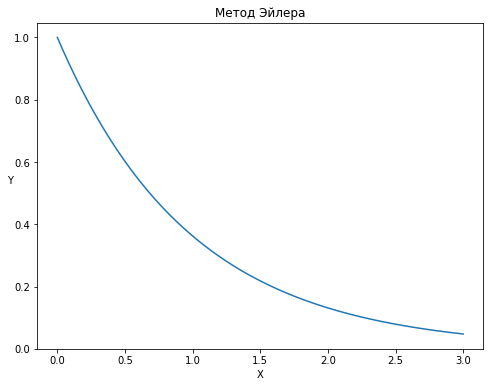

In [8]:
x_1, y_1 = Euler(f, a, b, N, x_0, y_0)
plt.figure(figsize=(8, 6))
plt.plot(x_1, y_1)
plt.title('Метод Эйлера')
plt.ylabel('Y', rotation=0)
plt.xlabel('X')

Text(0.5, 0, 'X')

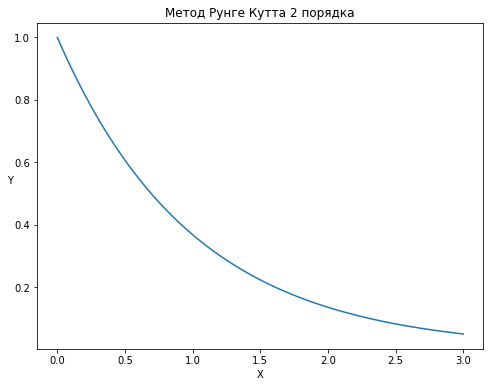

In [9]:
x_2, y_2 = RungeKutta_2nd(f, alpha, a, b, N, x_0, y_0)
plt.figure(figsize=(8, 6))
plt.plot(x_2, y_2)
plt.title('Метод Рунге Кутта 2 порядка')
plt.ylabel('Y', rotation=0)
plt.xlabel('X')

Text(0.5, 0, 'X')

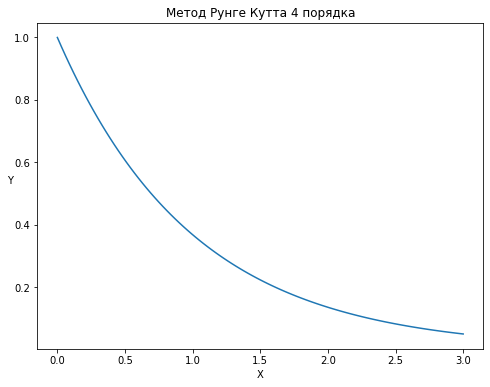

In [10]:
x_3, y_3 = RungeKutta_4nd(f, a, b, N, x_0, y_0)
plt.figure(figsize=(8, 6))
plt.plot(x_3, y_3)
plt.title('Метод Рунге Кутта 4 порядка')
plt.ylabel('Y', rotation=0)
plt.xlabel('X')

Text(0.5, 0, 'X')

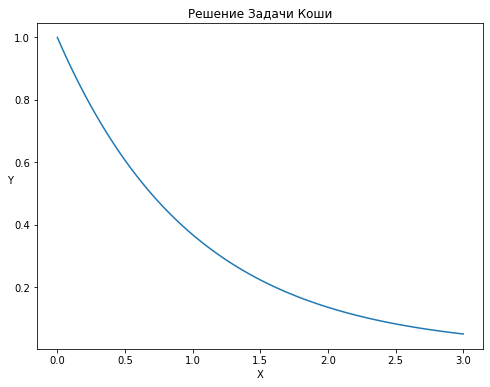

In [11]:
x, y = Solution(a, b, N)
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Решение Задачи Коши')
plt.ylabel('Y', rotation=0)
plt.xlabel('X')

Text(0.5, 0, 'X')

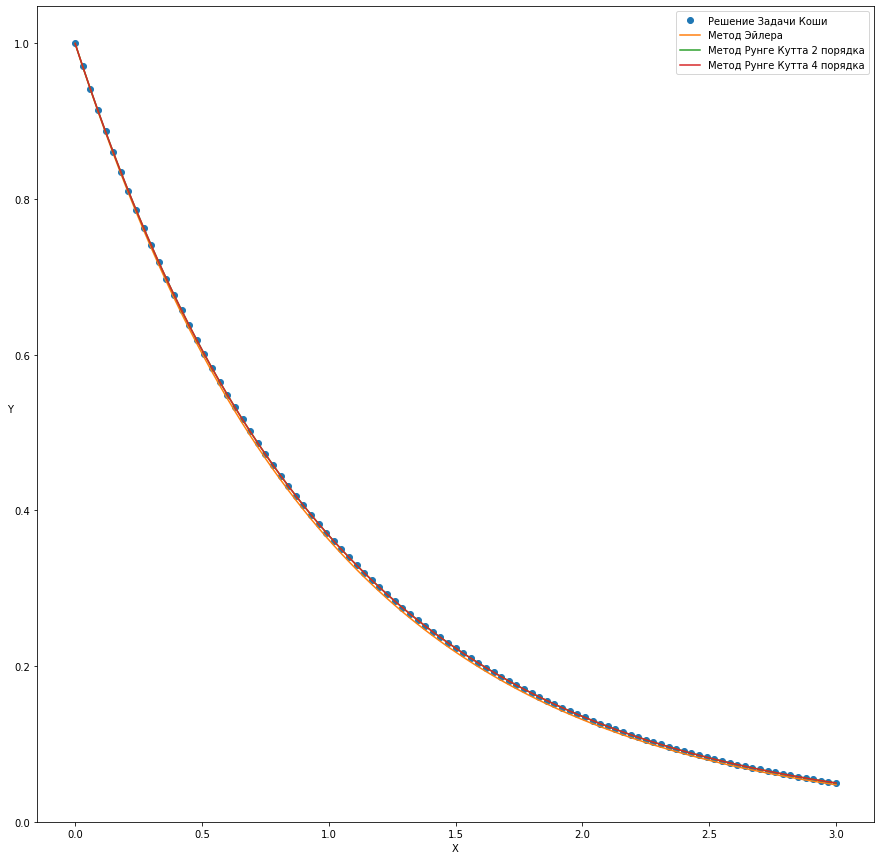

In [12]:
x, y = Solution(a, b, N)
x_1, y_1 = Euler(f, a, b, N, x_0, y_0)
x_2, y_2 = RungeKutta_2nd(f, alpha, a, b, N, x_0, y_0)
x_3, y_3 = RungeKutta_4nd(f, a, b, N, x_0, y_0)
plt.figure(figsize=(15, 15))
plt.plot(x, y, 'o', label='Решение Задачи Коши')
plt.plot(x_1, y_1, label='Метод Эйлера')
plt.plot(x_2, y_2, label='Метод Рунге Кутта 2 порядка')
plt.plot(x_3, y_3, label='Метод Рунге Кутта 4 порядка')
plt.legend()
plt.ylabel('Y', rotation=0)
plt.xlabel('X')

## Графики ошибки

In [13]:
err_1 = []
err_2 = []
err_3 = []
for i in range(0, N+1):
    err_1.append(abs(y_1[i] - y[i])/y[i])
    err_2.append(abs(y_2[i] - y[i])/y[i])
    err_3.append(abs(y_3[i] - y[i])/y[i])

Text(0.5, 0, 'X')

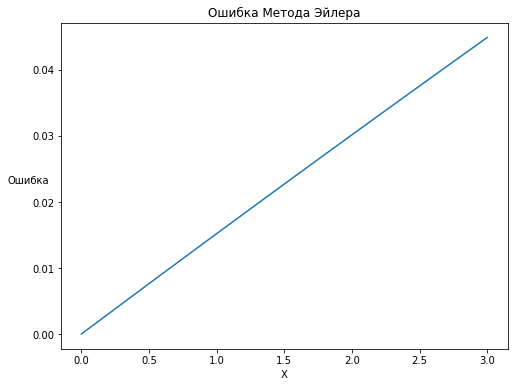

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(x, err_1)
plt.title('Ошибка Метода Эйлера')
plt.ylabel('Ошибка', rotation=0)
plt.xlabel('X')

Text(0.5, 0, 'X')

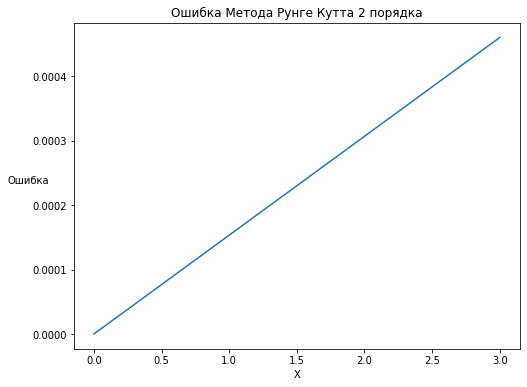

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(x, err_2)
plt.title('Ошибка Метода Рунге Кутта 2 порядка')
plt.ylabel('Ошибка', rotation=0)
plt.xlabel('X')

Text(0.5, 0, 'X')

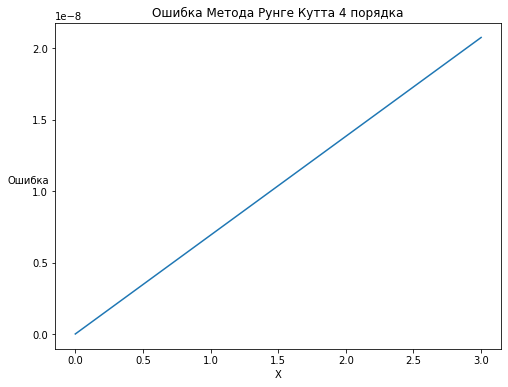

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(x, err_3)
plt.title('Ошибка Метода Рунге Кутта 4 порядка')
plt.ylabel('Ошибка', rotation=0)
plt.xlabel('X')

In [17]:
y_err = [1/2*x_err**2 - 1/6*x_err**3 for x_err in x]

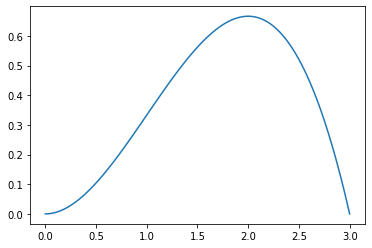

In [18]:
plt.plot(x, y_err)

In [19]:
import numpy as np
N_arr = range(1, 20)
h = [1/n for n in N_arr]
errn_1 = []
errn_2 = []
errn_3 = []
for n in N_arr:
    x, y = Solution(a, b, n)
    x_1, y_1 = Euler(f, a, b, n, x_0, y_0)
    x_2, y_2 = RungeKutta_2nd(f, alpha, a, b, n, x_0, y_0)
    x_3, y_3 = RungeKutta_4nd(f, a, b, n, x_0, y_0)
    err_1 = []
    err_2 = []
    err_3 = []
    for i in range(0, n+1):
        err_1.append(abs(y_1[i] - y[i]))
        err_2.append(abs(y_2[i] - y[i]))
        err_3.append(abs(y_3[i] - y[i]))
    errn_1.append(abs(max(err_1, key=abs)))
    errn_2.append(abs(max(err_2, key=abs)))
    errn_3.append(abs(max(err_3, key=abs)))

Text(0.5, 0, 'h')

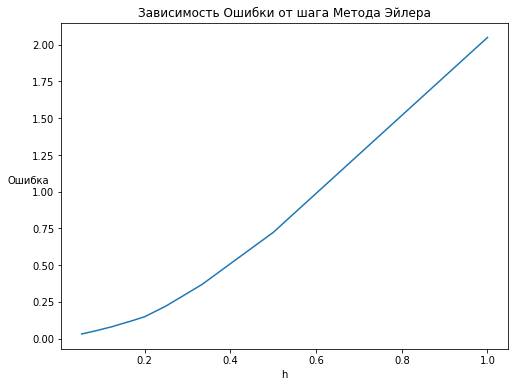

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(h,errn_1)
plt.title('Зависимость Ошибки от шага Метода Эйлера')
plt.ylabel('Ошибка', rotation=0)
plt.xlabel('h')

Text(0.5, 0, 'h')

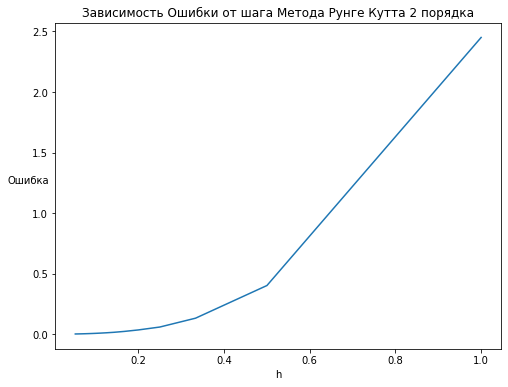

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(h,errn_2)
plt.title('Зависимость Ошибки от шага Метода Рунге Кутта 2 порядка')
plt.ylabel('Ошибка', rotation=0)
plt.xlabel('h')

Text(0.5, 0, 'h')

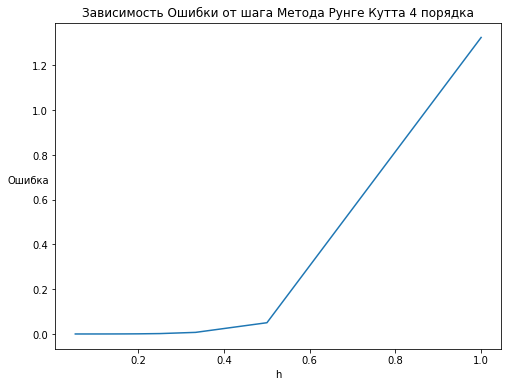

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(h,errn_3)
plt.title('Зависимость Ошибки от шага Метода Рунге Кутта 4 порядка')
plt.ylabel('Ошибка', rotation=0)
plt.xlabel('h')